⚠️  idx 3 skipped (no embedding)
⚠️  idx 16 skipped (no embedding)
⚠️  idx 29 skipped (no embedding)
⚠️  idx 30 skipped (no embedding)
⚠️  idx 45 skipped (no embedding)
⚠️  idx 50 skipped (no embedding)
⚠️  idx 53 skipped (no embedding)
⚠️  idx 73 skipped (no embedding)
⚠️  idx 86 skipped (no embedding)
⚠️  idx 98 skipped (no embedding)
⚠️  idx 103 skipped (no embedding)
⚠️  idx 115 skipped (no embedding)
⚠️  idx 131 skipped (no embedding)
⚠️  idx 146 skipped (no embedding)
⚠️  idx 159 skipped (no embedding)


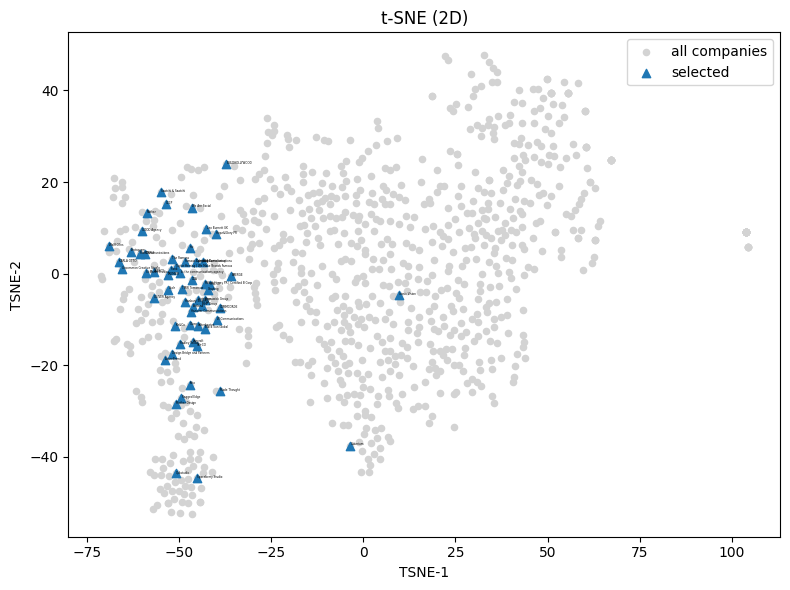

⚠️  idx 160 skipped (no embedding)
⚠️  idx 167 skipped (no embedding)
⚠️  idx 185 skipped (no embedding)
⚠️  idx 191 skipped (no embedding)
⚠️  idx 193 skipped (no embedding)
⚠️  idx 197 skipped (no embedding)
⚠️  idx 200 skipped (no embedding)
⚠️  idx 207 skipped (no embedding)
⚠️  idx 213 skipped (no embedding)
⚠️  idx 216 skipped (no embedding)
⚠️  idx 229 skipped (no embedding)
⚠️  idx 235 skipped (no embedding)
⚠️  idx 238 skipped (no embedding)
⚠️  idx 263 skipped (no embedding)
⚠️  idx 276 skipped (no embedding)
⚠️  idx 282 skipped (no embedding)
⚠️  idx 292 skipped (no embedding)
⚠️  idx 295 skipped (no embedding)
⚠️  idx 301 skipped (no embedding)
⚠️  idx 326 skipped (no embedding)
⚠️  idx 333 skipped (no embedding)
⚠️  idx 342 skipped (no embedding)
⚠️  idx 366 skipped (no embedding)
⚠️  idx 376 skipped (no embedding)


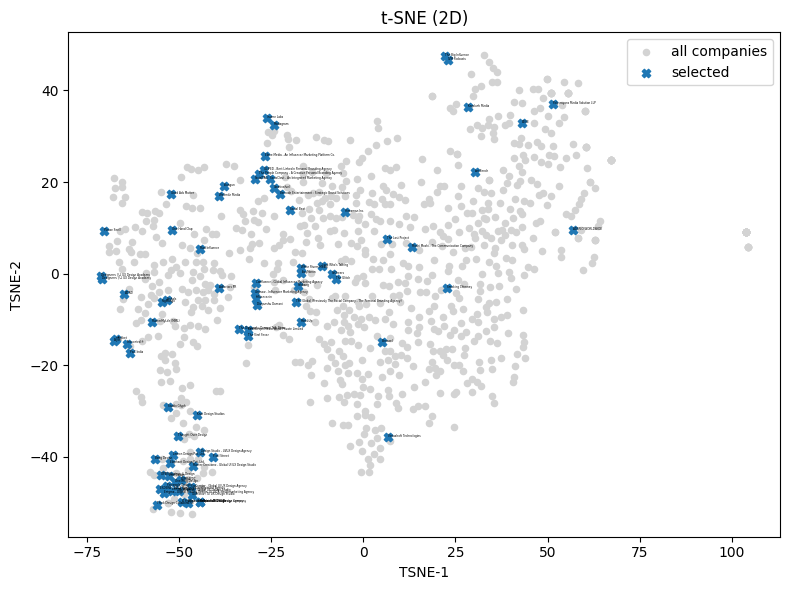

In [6]:
import os
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ── CONFIGURATION ────────────────────────────────────────────────
RAW_BUSINESS_CSV    = "Merged_LinkedIn_Sort_Clean_Cleaned_cleaned.csv"       # your original data (has name + service_1…service_24)
SERVICE_EMB_CSV     = "service_embeddings.csv"       # your precomputed service → embedding
COMPANY2D_EMB_CSV   = "company_embeddings_2d.csv"    # your PCA/t-SNE 2D coords per company

# ── STEP 1: load your business names & services ─────────────────
df_bus = pd.read_csv(RAW_BUSINESS_CSV)
service_cols = [f"service_{i}" for i in range(1, 25)]
if "name" not in df_bus.columns:
    raise KeyError("`cleaned_businesses.csv` must contain a `name` column")

# ── STEP 2: load service embeddings lookup ────────────────────────
df_svc = pd.read_csv(SERVICE_EMB_CSV)
# assume `embedding` is literal Python list notation (e.g. "[0.1, -0.2, …]")
df_svc["vec"] = df_svc["embedding"].apply(ast.literal_eval).apply(np.array)
service_to_vec = dict(zip(df_svc["service"], df_svc["vec"]))

# ── STEP 3: load company 2D embeddings ────────────────────────────
df_cmp = pd.read_csv(COMPANY2D_EMB_CSV)
required = {"index","name","pca_x","pca_y","tsne_x","tsne_y"}
if not required.issubset(df_cmp.columns):
    raise KeyError(f"`{COMPANY2D_EMB_CSV}` must have columns: {required}")

# build lookups from original row-index → (x,y)
pca_lookup  = dict(zip(df_cmp["index"], df_cmp[["pca_x","pca_y"]].values.tolist()))
tsne_lookup = dict(zip(df_cmp["index"], df_cmp[["tsne_x","tsne_y"]].values.tolist()))

# ── STEP 4: plotting helper ───────────────────────────────────────
def plot_companies(indices, lookup, title, xlabel, ylabel, marker="o"):
    plt.figure(figsize=(8,6))
    # background: all companies
    all_xy = np.array(list(lookup.values()))
    plt.scatter(all_xy[:,0], all_xy[:,1], c="lightgray", s=20, label="all companies")

    xs, ys = [], []
    for idx in indices:
        if idx not in lookup:
            print(f"⚠️  idx {idx} skipped (no embedding)")
            continue
        x, y = lookup[idx]
        xs.append(x); ys.append(y)
        # get the name (from df_cmp or fallback to df_bus)
        name = df_cmp.loc[df_cmp["index"]==idx, "name"].iat[0]
        plt.text(x + 0.02, y + 0.02, name, fontsize=2)
    plt.scatter(xs, ys, marker=marker, label="selected")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ── USAGE EXAMPLES ───────────────────────────────────────────────
if __name__ == "__main__":
    # plot companies 5 & 20 on PCA
    #plot_companies([5, 20], pca_lookup, "PCA (2D)", "PC1", "PC2", marker="X")

    # plot rows 0–9 on t-SNE
    plot_companies([0,3,7,8,10,11,12,13,14,15,16,17,18,28,29,30,32,34,38,39,43,44,45,48,50,52,53,64,65,68,70,71,72,73,74,79,81,83,85,86,90,96,98,102,103,107,110,111,114,115,119,120,126,128,130,131,138,140,141,146,151,157,159,165,169,170,176,178,179,187,269,320,417], tsne_lookup, "t-SNE (2D)", "TSNE-1", "TSNE-2", marker="^")
    plot_companies([2,
4,
9,
25,
26,
36,
37,
40,
41,
51,
55,
60,
66,
69,
75,
84,
88,
91,
95,
97,
99,
117,
121,
124,
135,
137,
142,
145,
149,
160,
167,
181,
182,
184,
185,
186,
191,
193,
197,
200,
207,
211,
213,
216,
225,
229,
235,
236,
238,
246,
249,
250,
251,
257,
258,
259,
260,
261,
263,
265,
266,
270,
272,
273,
276,
281,
282,
285,
292,
295,
296,
301,
304,
307,
315,
317,
326,
327,
331,
333,
334,
342,
358,
364,
366,
367,
369,
372,
375,
376,
377,
380,
381,
386,
388,
471,
485,
575,
661,
683,
741,
788,
842,
966], tsne_lookup, "t-SNE (2D)", "TSNE-1", "TSNE-2", marker="X")